In [107]:
%matplotlib inline
import pandas as pd
from subprocess import call


ret = call(["./fetch_log.sh"])

if ret != 0:
    print("Problem ", ret)
else:
    print("Downloaded!")

Downloaded!


In [108]:
log = pd.read_csv('log.out', sep="#").iloc[:,0]
rewards = log[log.str.startswith("Game reward: ")].str.extract('^Game reward: (\d*)')
loss = log[log.str.startswith("loss:")].str.extract('loss:  (\d+\.\d+)').astype(float)
epsilon = log[log.str.startswith('epsilon:')].str.extract('epsilon:  (\d+\.\d+)').astype(float)

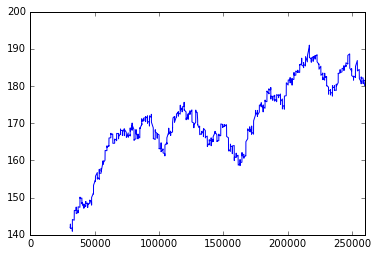

In [113]:
pd.rolling_mean(rewards, 300).plot()

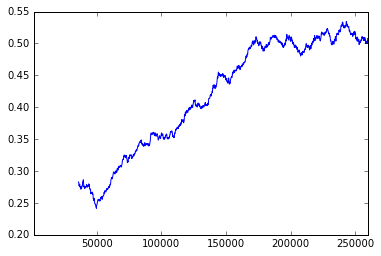

In [110]:
pd.rolling_mean(loss, 300).plot()

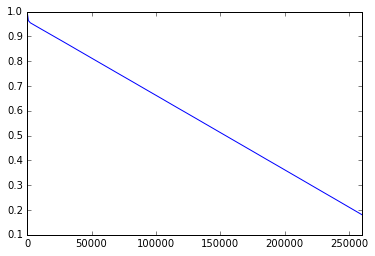

In [111]:
epsilon.plot()

In [114]:
ret = call(["./fetch_weights.sh"])
if ret != 0:
    print("Problem ", ret)